In [1]:
import types

def all_saptak():
    names = ["Sa", "Re_", "Re", "Ga_", "Ga", "Ma", "Ma__", "Pa", "Dha_", "Dha", "Ni_", "Ni"]
    mandra = [n.lower() for n in names]
    tar = [n.upper() for n in names]
    return tuple(mandra + names + tar)


def window(item, items, width=7):
    index = items.index(item)
    start = index - width
    end = index + width + 1
    if start < 0:
        start = 0
    if end > len(items):
        end = len(items)
    return items[start:end]




In [2]:
window("Sa", all_saptak())

('ma',
 'ma__',
 'pa',
 'dha_',
 'dha',
 'ni_',
 'ni',
 'Sa',
 'Re_',
 'Re',
 'Ga_',
 'Ga',
 'Ma',
 'Ma__',
 'Pa')

In [3]:
import random
import numpy as np

def take (seq, n):
    return [next(seq) for i in range(n)]
def get_next(probs):
    r = random.random() #random.uniform()?
    index = 0
    while(r >= 0 and index < len(probs)):
        r -= probs[index]
        index += 1
    return all_saptak()[index - 1]
    
def aalap(initial, beats=4, transition_up=None, transition_down=None):
    current = initial
    scale = all_saptak()
    yield initial
    while True:
        aroha = random.choice([True, False])
        for i in range(beats):
            if aroha:
                current = get_next([transition_up[current][v] for v in scale])
            else:
                current = get_next([transition_down[current][v] for v in scale])
            yield current
            

In [4]:
probs = [row.strip().split(",") for row in open("/home/vikrant/Downloads/prob_matrix.txt")]

In [5]:
probs = [[float(f) for f in row ]for row in probs]

In [6]:
transpose = list(zip(*probs))

In [7]:
def add(a, b):
    return a+b

In [8]:
add(1, 2)

3

In [9]:
args = [1,2]

In [10]:
add(*args)

3

In [11]:
add

<function __main__.add(a, b)>

In [12]:
list(zip([1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]))

[(1, 2, 3), (1, 2, 3), (1, 2, 3), (1, 2, 3)]

In [13]:
transpose[5]

(0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0)

In [14]:
def read_prob_from_file(filename):
    """
    file is csv with every column as transition probability for one swar.
    for 36 swar there are 36 columns and every column contains 36 rows
    """
    with open(filename) as f:
        data = [[float(f) for f in row.strip().split(",")] for row in f]
    return list(zip(*data)) #transpose

def convert_to_transition(matrix):
    """
    matrix rows are transition probabilties for given swar.
    it is matrix of size 36x36
    """
    swar = all_saptak()
    return {swar[i] : {swar[j]: item for j, item in enumerate(row)} for i, row in enumerate(matrix)}

In [15]:
transition_up = convert_to_transition(transpose)

In [16]:
transition_up

{'sa': {'sa': 0.0,
  're_': 0.0,
  're': 0.0,
  'ga_': 0.0,
  'ga': 0.0,
  'ma': 0.0,
  'ma__': 0.0,
  'pa': 0.0,
  'dha_': 0.0,
  'dha': 0.0,
  'ni_': 0.0,
  'ni': 0.0,
  'Sa': 0.0,
  'Re_': 0.0,
  'Re': 0.0,
  'Ga_': 0.0,
  'Ga': 0.0,
  'Ma': 0.0,
  'Ma__': 0.0,
  'Pa': 0.0,
  'Dha_': 0.0,
  'Dha': 0.0,
  'Ni_': 0.0,
  'Ni': 0.0,
  'SA': 0.0,
  'RE_': 0.0,
  'RE': 0.0,
  'GA_': 0.0,
  'GA': 0.0,
  'MA': 0.0,
  'MA__': 0.0,
  'PA': 0.0,
  'DHA_': 0.0,
  'DHA': 0.0,
  'NI_': 0.0,
  'NI': 0.0},
 're_': {'sa': 0.0,
  're_': 0.0,
  're': 0.0,
  'ga_': 0.0,
  'ga': 0.0,
  'ma': 0.0,
  'ma__': 0.0,
  'pa': 0.0,
  'dha_': 0.0,
  'dha': 0.0,
  'ni_': 0.0,
  'ni': 0.0,
  'Sa': 0.0,
  'Re_': 0.0,
  'Re': 0.0,
  'Ga_': 0.0,
  'Ga': 0.0,
  'Ma': 0.0,
  'Ma__': 0.0,
  'Pa': 0.0,
  'Dha_': 0.0,
  'Dha': 0.0,
  'Ni_': 0.0,
  'Ni': 0.0,
  'SA': 0.0,
  'RE_': 0.0,
  'RE': 0.0,
  'GA_': 0.0,
  'GA': 0.0,
  'MA': 0.0,
  'MA__': 0.0,
  'PA': 0.0,
  'DHA_': 0.0,
  'DHA': 0.0,
  'NI_': 0.0,
  'NI': 0.0},
 

In [17]:
a = aalap("Sa", 4, transition_up, transition_up)

In [18]:
take(a, 16)

['Sa',
 'Sa',
 'Sa',
 'dha',
 'Sa',
 'Sa',
 'Sa',
 'dha',
 'Sa',
 'Pa',
 'Ga',
 'Dha',
 'SA',
 'SA',
 'Dha',
 'SA']

In [19]:
take(a, 16)

['Dha',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Pa',
 'SA',
 'SA',
 'Dha',
 'SA',
 'SA',
 'Dha',
 'Pa',
 'Ga',
 'Ga',
 'Pa']

In [20]:
transition_up['Dha']

{'sa': 0.0,
 're_': 0.0,
 're': 0.0,
 'ga_': 0.0,
 'ga': 0.0,
 'ma': 0.0,
 'ma__': 0.0,
 'pa': 0.0,
 'dha_': 0.0,
 'dha': 0.0,
 'ni_': 0.0,
 'ni': 0.0,
 'Sa': 0.0,
 'Re_': 0.0,
 'Re': 0.037037,
 'Ga_': 0.0,
 'Ga': 0.0,
 'Ma': 0.0,
 'Ma__': 0.0,
 'Pa': 0.44444,
 'Dha_': 0.0,
 'Dha': 0.18519,
 'Ni_': 0.0,
 'Ni': 0.0,
 'SA': 0.2963,
 'RE_': 0.0,
 'RE': 0.0,
 'GA_': 0.0,
 'GA': 0.037037,
 'MA': 0.0,
 'MA__': 0.0,
 'PA': 0.0,
 'DHA_': 0.0,
 'DHA': 0.0,
 'NI_': 0.0,
 'NI': 0.0}

In [21]:
convert_to_transition(read_prob_from_file("/home/vikrant/Downloads/prob_matrix.txt"))["Dha"]

{'sa': 0.0,
 're_': 0.0,
 're': 0.0,
 'ga_': 0.0,
 'ga': 0.0,
 'ma': 0.0,
 'ma__': 0.0,
 'pa': 0.0,
 'dha_': 0.0,
 'dha': 0.0,
 'ni_': 0.0,
 'ni': 0.0,
 'Sa': 0.0,
 'Re_': 0.0,
 'Re': 0.037037,
 'Ga_': 0.0,
 'Ga': 0.0,
 'Ma': 0.0,
 'Ma__': 0.0,
 'Pa': 0.44444,
 'Dha_': 0.0,
 'Dha': 0.18519,
 'Ni_': 0.0,
 'Ni': 0.0,
 'SA': 0.2963,
 'RE_': 0.0,
 'RE': 0.0,
 'GA_': 0.0,
 'GA': 0.037037,
 'MA': 0.0,
 'MA__': 0.0,
 'PA': 0.0,
 'DHA_': 0.0,
 'DHA': 0.0,
 'NI_': 0.0,
 'NI': 0.0}

### Functions to work out probabilities from notations ###

In [22]:
def old_all_octaves(file):
    with open(file) as f:
        return f.read().strip().replace("\n",",").split(",")
    
def old_octaves():
    return ['sa','lre','re','lga','ga','ma','mau','pa','lda','da','lni','ni',
            'sA','lrE','rE','lgA','gA','mA','mAu','pA','ldA','dA','lnI','nI',
            'SA','lRE','RE','lGA','GA','MA','MAu','PA','lDA','DA','lNI','NI']
    
def old_to_new(file):
    """
    sa, lre, re ... -> sa, re_, re, ga_, ga...
    """
    with open(file) as f:
        s = f.read()
        newoctave = all_saptak()
        for i, item in enumerate(old_octaves()):
            s = s.replace(item, newoctave[i])
        return s
    
def transiotion_hist_up(data):
    """
    data is saragam string read from file
    """
    saptak = all_saptak() +('',)
   
    data = data.strip().replace("\n",",,").split(",")
    hist = {i:{j:0 for j in saptak} for i in saptak}
   
    for i, s in enumerate(data[:-1]):
        hist[s][data[i+1]] += 1
        
    return hist
    
def remove_empty(data):
    
    for v in data.values():
        del v['']
    del data['']
    return data
    
def compute_prob(hist):
    
    def divide(a, b):
        return a/b if b > 0 else 0
        
    hist = remove_empty(hist)
    probs = {}
    for k, v in hist.items():
        probs[k] = {k1: divide(v1,sum(v.values())) for k1, v1 in v.items()}
    return probs
        
def transiotion_hist_down(data):
    """
    data is saragam string read from file
    """
    saptak = all_saptak() +('',)
   
    data = data.strip().replace("\n",",,").split(",")
 
    hist = {i:{j:0 for j in saptak} for i in saptak}

    for i, s in enumerate(data[1:]):
        hist[s][data[i-1]] += 1
 
    return hist
    
def transiotion_prob_up(file):
    return compute_prob(transiotion_hist_up(file))

def transiotion_prob_down(file):
    return compute_prob(transiotion_hist_down(file))



def test_probs():
    p1 = transiotion_prob_up(old_to_new("/home/vikrant/Downloads/Bhoop1.txt"))
    p2 = convert_to_transition(read_prob_from_file("/home/vikrant/Downloads/prob_matrix.txt"))
    for k in p1:
        v1 = p1[k]
        v2 = p2[k]
        for j in v1:
            assert abs(v1[j] - v2[j])<= 0.001

In [23]:
old_all_octaves("/home/vikrant/Downloads/AllOctaves.txt" )

['sa',
 'lre',
 're',
 'lga',
 'ga',
 'ma',
 'mau',
 'pa',
 'lda',
 'da',
 'lni',
 'ni',
 'sA',
 'lrE',
 'rE',
 'lgA',
 'gA',
 'mA',
 'mAu',
 'pA',
 'ldA',
 'dA',
 'lnI',
 'nI',
 'SA',
 'lRE',
 'RE',
 'lGA',
 'GA',
 'MA',
 'MAu',
 'PA',
 'lDA',
 'DA',
 'lNI',
 'NI']

In [24]:
help([].extend)

Help on built-in function extend:

extend(iterable, /) method of builtins.list instance
    Extend list by appending elements from the iterable.



In [25]:
old_to_new("/home/vikrant/Downloads/Bhoop1.txt").strip().replace("\n",",").replace(",,",",").split(",")

['SA',
 'SA',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Sa',
 'Re',
 'Ga',
 'Ga',
 'Pa',
 'Ga',
 'Dha',
 'Pa',
 'Ga',
 'Ga',
 'Ga',
 'Pa',
 'Dha',
 'SA',
 'RE',
 'SA',
 'Dha',
 'Pa',
 'SA',
 'Pa',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Sa',
 'Sa',
 'Ga',
 'Ga',
 'Pa',
 'Dha',
 'Pa',
 'SA',
 'SA',
 'SA',
 'Dha',
 'Dha',
 'SA',
 'RE',
 'GA',
 'RE',
 'SA',
 'Dha',
 'GA',
 'GA',
 'RE',
 'SA',
 'RE',
 'RE',
 'SA',
 'Dha',
 'SA',
 'Pa',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Sa',
 'Sa',
 'Ga',
 'Re',
 'Ga',
 'Ga',
 'Sa',
 'Re',
 'Sa',
 'Sa',
 'Sa',
 'Sa',
 'Sa',
 'dha',
 'Sa',
 'Re',
 'Ga',
 'Ga',
 'Pa',
 'Ga',
 'Pa',
 'Pa',
 'Dha',
 'Dha',
 'Pa',
 'Pa',
 'Ga',
 'Pa',
 'Dha',
 'SA',
 'Dha',
 'Pa',
 'Ga',
 'Sa',
 'Pa',
 'Ga',
 'Ga',
 'Re',
 'Ga',
 'Pa',
 'SA',
 'Dha',
 'SA',
 'SA',
 'SA',
 'SA',
 'Dha',
 'Re',
 'SA',
 'SA',
 'Dha',
 'Dha',
 'Dha',
 'Dha',
 'SA',
 'RE',
 'GA',
 'RE',
 'SA',
 'SA',
 'Dha',
 'Pa',
 'Dha',
 'SA',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Ga',
 'Ga',
 'Ga',
 'Re',
 'Pa',
 'Ga',
 'Dha',
 'Pa',
 'Dha',


In [26]:
p1 = transiotion_prob_down(old_to_new("/home/vikrant/Downloads/Bhoop1.txt"))

In [27]:
p2 = convert_to_transition(read_prob_from_file("/home/vikrant/Downloads/prob_matrix.txt"))

In [28]:
len(p1) == len(p2)

True

In [29]:
p1['Dha']

{'sa': 0.0,
 're_': 0.0,
 're': 0.0,
 'ga_': 0.0,
 'ga': 0.0,
 'ma': 0.0,
 'ma__': 0.0,
 'pa': 0.0,
 'dha_': 0.0,
 'dha': 0.0,
 'ni_': 0.0,
 'ni': 0.0,
 'Sa': 0.0,
 'Re_': 0.0,
 'Re': 0.0,
 'Ga_': 0.0,
 'Ga': 0.11538461538461539,
 'Ma': 0.0,
 'Ma__': 0.0,
 'Pa': 0.19230769230769232,
 'Dha_': 0.0,
 'Dha': 0.2692307692307692,
 'Ni_': 0.0,
 'Ni': 0.0,
 'SA': 0.3076923076923077,
 'RE_': 0.0,
 'RE': 0.11538461538461539,
 'GA_': 0.0,
 'GA': 0.0,
 'MA': 0.0,
 'MA__': 0.0,
 'PA': 0.0,
 'DHA_': 0.0,
 'DHA': 0.0,
 'NI_': 0.0,
 'NI': 0.0}

In [30]:
p2['Dha']

{'sa': 0.0,
 're_': 0.0,
 're': 0.0,
 'ga_': 0.0,
 'ga': 0.0,
 'ma': 0.0,
 'ma__': 0.0,
 'pa': 0.0,
 'dha_': 0.0,
 'dha': 0.0,
 'ni_': 0.0,
 'ni': 0.0,
 'Sa': 0.0,
 'Re_': 0.0,
 'Re': 0.037037,
 'Ga_': 0.0,
 'Ga': 0.0,
 'Ma': 0.0,
 'Ma__': 0.0,
 'Pa': 0.44444,
 'Dha_': 0.0,
 'Dha': 0.18519,
 'Ni_': 0.0,
 'Ni': 0.0,
 'SA': 0.2963,
 'RE_': 0.0,
 'RE': 0.0,
 'GA_': 0.0,
 'GA': 0.037037,
 'MA': 0.0,
 'MA__': 0.0,
 'PA': 0.0,
 'DHA_': 0.0,
 'DHA': 0.0,
 'NI_': 0.0,
 'NI': 0.0}

In [31]:
test_probs()

AssertionError: 

In [32]:
%%file bhoop.csv
SA,SA,Dha,Pa,Ga,Re,Sa,Re,Ga,Ga,Pa,Ga,Dha,Pa,Ga,Ga
Ga,Pa,Dha,SA,RE,SA,Dha,Pa,SA,Pa,Dha,Pa,Ga,Re,Sa,Sa
Ga,Ga,Pa,Dha,Pa,SA,SA,SA,Dha,Dha,SA,RE,GA,RE,SA,Dha
GA,GA,RE,SA,RE,RE,SA,Dha,SA,Pa,Dha,Pa,Ga,Re,Sa,Sa

Ga,Re,Ga,Ga,Sa,Re,Sa,Sa,Sa,Sa,Sa,dha,Sa,Re,Ga,Ga
Pa,Ga,Pa,Pa,Dha,Dha,Pa,Pa,Ga,Pa,Dha,SA,Dha,Pa,Ga,Sa
Pa,Ga,Ga,Re,Ga,Pa,SA,Dha,SA,SA,SA,SA,Dha,Re,SA,SA
Dha,Dha,Dha,Dha,SA,RE,GA,RE,SA,SA,Dha,Pa,Dha,SA,Dha,Pa
Ga,Re,Ga,Ga,Ga,Re,Pa,Ga,Dha,Pa,Dha,SA,Dha,Pa,Ga,Sa

Sa,Re,Ga,Pa,Ga,Re,Sa,Sa,Re,Pa,Pa,Pa,Re,Ga,Ga,Re
Ga,Ga,Pa,Ga,Re,Ga,Pa,Dha,SA,SA,SA,SA,Dha,Dha,Pa,Ga,Pa
Dha,RE,SA,SA,Dha,Dha,Pa,Ga,Re,Ga,Pa,Dha,SA,Pa,Dha,SA,Dha,SA,Dha,Pa,Ga,Re,Sa

Pa,Ga,Ga,Ga,Pa,Pa,SA,Dha,SA,SA,SA,SA,SA,RE,GA,RE,SA,SA
SA,Dha,Dha,SA,SA,SA,RE,RE,Dha,SA,Pa,Dha,SA,SA,Dha,Dha,Pa
Ga,Ga,Pa,Ga,Re,Ga,Pa,Dha,SA,SA,RE,GA,RE,SA,Dha,Pa,Dha,SA,Dha,Pa,Ga,Re,Ga,Pa,Ga,Re,Sa


Sa,dha,dha,Sa
dha,Sa,Re
Sa,Re
dha,Sa
Sa,Re,Ga,Re,Ga,Sa,Re,dha,Sa
Sa,Re,Ga,Re,Ga,Pa,Ga,Re,Pa,Ga,dha,dha,Sa
Ga,Pa,Dha,Ga,Ga,Ga,Pa
Ga,Pa,Dha,Pa,Ga,Re,Sa
Ga,Pa,Dha,SA,SA,Dha,Pa,Ga,Re,Ga,Re,Pa,Ga,Re,Sa
Ga,Re,Sa,Re,Ga,Pa,Dha,SA,Pa,Dha,SA,RE,GA,RE,SA
Dha,SA,RE,SA,Dha,SA,Dha,Pa,Ga,Pa,Dha,Pa,Ga,Pa,Ga,Re,Sa,dha,dha,Sa


Overwriting bhoop.csv


In [33]:
with open("bhoop.csv") as f:
    data = f.read()
a = aalap("Sa", 8, transiotion_prob_up(data), transiotion_prob_down(data))

In [34]:
transiotion_prob_down(data)['Ga']

{'sa': 0.0,
 're_': 0.0,
 're': 0.0,
 'ga_': 0.0,
 'ga': 0.0,
 'ma': 0.0,
 'ma__': 0.0,
 'pa': 0.0,
 'dha_': 0.0,
 'dha': 0.0,
 'ni_': 0.0,
 'ni': 0.0,
 'Sa': 0.15625,
 'Re_': 0.0,
 'Re': 0.140625,
 'Ga_': 0.0,
 'Ga': 0.328125,
 'Ma': 0.0,
 'Ma__': 0.0,
 'Pa': 0.140625,
 'Dha_': 0.0,
 'Dha': 0.234375,
 'Ni_': 0.0,
 'Ni': 0.0,
 'SA': 0.0,
 'RE_': 0.0,
 'RE': 0.0,
 'GA_': 0.0,
 'GA': 0.0,
 'MA': 0.0,
 'MA__': 0.0,
 'PA': 0.0,
 'DHA_': 0.0,
 'DHA': 0.0,
 'NI_': 0.0,
 'NI': 0.0}

In [35]:
take(a, 16)

['Sa',
 'Re',
 'Ga',
 'Pa',
 'Ga',
 'Re',
 'Sa',
 'dha',
 'Sa',
 'Ga',
 'Ga',
 'Dha',
 'Dha',
 'Dha',
 'Ga',
 'Ga']

### Aalap with nyaas ###

In [38]:
def aalap_nyaas(initial, beats=8, nyaas = None, transition_up=None, transition_down=None):
    current = initial
    scale = all_saptak()
    yield initial
    
    while True:
        if current in nyaas:
            aroha = random.choice([True, False])
        for i in range(beats):
            if aroha:
                current = get_next([transition_up[current][v] for v in scale])
            else:
                current = get_next([transition_down[current][v] for v in scale])
            yield current
            

In [39]:
a = aalap_nyaas("Sa", beats=8, nyaas=['sa','Sa','SA','re','Re','RE','ga','Ga','GA'],
     transition_up=transiotion_prob_up(data), transition_down=transiotion_prob_down(data))

In [40]:
for i,item in enumerate(take(a, 32)):
    print(i+1, item)

1 Sa
2 Sa
3 dha
4 dha
5 Sa
6 Re
7 Ga
8 Pa
9 Ga
10 Dha
11 Ga
12 Dha
13 RE
14 RE
15 SA
16 Pa
17 Re
18 Pa
19 Ga
20 Dha
21 Pa
22 Ga
23 Ga
24 Pa
25 Dha
26 Pa
27 Ga
28 Sa
29 Sa
30 Sa
31 Re
32 Sa


In [77]:
from collections import deque
def search(seq, subseq, end=100):
    def compare(source, dest):
        for item in dest:
            return any(["".join(item).lower() in "".join(source).lower() for item in dest])
    
    n = len(max(subseq, key=len))
    window = deque(take(seq, n), n)
    for i in range(n, end):
        if compare(window, subseq):
            yield i-n
            window = deque(take(seq, n), n)
        else:
            window.append(next(seq))
            

def count(seq):
    return sum(1 for i in seq)
        
        

In [78]:
a = aalap_nyaas("Sa", beats=8, nyaas=['sa','Sa','SA','re','Re','RE','ga','Ga','GA'],
     transition_up=transiotion_prob_up(data), transition_down=transiotion_prob_down(data))

pakad = [["dha","dha","sa"],["ga","re","pa","ga"],["dha","pa","ga","re"]]

sum([count(search(a,pakad, 64)) for i in range(1000)])/1000

1.558

In [79]:
1024/16

64.0

In [80]:
def subset_prob(probs, start, end):
    subset = probs[start:end]
    newvalues = [v/sum(subset) for v in subset]
    return [0 for i in range(start)] + newvalues + [0 for i in range(end, len(probs))]

In [81]:
subset_prob([0.1,0.2,0.3,0.1,0.2,0.2],0,3)

[0.16666666666666666, 0.3333333333333333, 0.4999999999999999, 0, 0, 0]

In [82]:
def aalap_bounded(beats=8, top_bound = 5, transition_up=None, transition_down=None):
    initial = 'Sa'
    scale = all_saptak()
    yield initial
    current = initial
    index = scale.index(initial)
    
    if top_bound > 0:
        aroha = True
    else:
        aroha = False
    for i in range(beats):
        if aroha:
            current = get_next(subset_prob([transition_up[current][v] for v in scale], 0, index + top_bound))
            if scale.index(current) == index + top_bound:
                print(current, scale.index(current), top_bound+index)
                aroha = False
        else:
            current = get_next(subset_prob([transition_down[current][v] for v in scale], 0, index + top_bound))
        yield current
        

In [83]:
a = aalap_bounded(beats=64, top_bound=12,
     transition_up=transiotion_prob_up(data), transition_down=transiotion_prob_down(data))

for i,j in enumerate(a):
    print(i, j)

0 Sa
1 Re
2 Ga
3 dha
4 Sa
5 Sa
6 dha
7 Sa
8 Re
9 Ga
10 Pa
11 Ga
12 Pa
13 Ga
14 Re
15 Sa
16 dha
17 Sa
18 Sa
19 Re
20 Ga
21 Pa
22 Dha
23 Pa
24 Ga
25 Sa
26 Re
27 Ga
28 Re
29 Sa
30 dha
31 Sa
32 Re
33 Ga
34 Re
35 dha
36 dha
37 dha
38 Sa
39 Re
40 Ga
41 Re
42 Ga
43 Re
44 Ga
45 Ga
46 Ga
47 Pa
48 Ga
49 Re
50 Ga
51 Pa
52 Ga
53 Re
54 Ga
55 Pa
56 Ga
57 dha
58 dha
59 Sa
60 Re
61 Sa
62 Sa
63 Re
64 Sa


In [84]:
a = aalap("Sa",8,transiotion_prob_up(data), transiotion_prob_up(data))

In [85]:
take(a, 16)

['Sa',
 'Sa',
 'Sa',
 'Re',
 'Ga',
 'Ga',
 'Dha',
 'SA',
 'SA',
 'SA',
 'SA',
 'SA',
 'RE',
 'SA',
 'SA',
 'Dha']

In [86]:
take(a, 32)

['Pa',
 'Ga',
 'Re',
 'dha',
 'Sa',
 'Sa',
 'dha',
 'Sa',
 'Sa',
 'Re',
 'Pa',
 'Pa',
 'Ga',
 'dha',
 'Sa',
 'Sa',
 'Sa',
 'Sa',
 'Sa',
 'Re',
 'Ga',
 'Re',
 'Sa',
 'Re',
 'Ga',
 'Re',
 'Sa',
 'Sa',
 'dha',
 'Sa',
 'Sa',
 'dha']

In [87]:
def transition_probability(data):
    data = data.strip().replace("\n",",,").split(",")
    hist = {}
    for i, item in enumerate(data[:-1]):
        if item and data[i+1]:
            itemd = hist.get(item, {})
            itemd[data[i+1]] = itemd.get(data[i+1], 0) + 1
            hist[item] = itemd
    prob = {}
    for k in hist:
        total  = sum(hist[k].values())
        prob[k] = {j: v/total for j,v in hist[k].items()}
    return prob
                

In [88]:
p = transition_probability(data)

In [89]:
p.keys()

dict_keys(['SA', 'Dha', 'Pa', 'Ga', 'Re', 'Sa', 'RE', 'GA', 'dha'])

In [90]:
p

{'SA': {'SA': 0.3728813559322034,
  'Dha': 0.3898305084745763,
  'RE': 0.15254237288135594,
  'Pa': 0.0847457627118644},
 'Dha': {'Pa': 0.38596491228070173,
  'SA': 0.40350877192982454,
  'Dha': 0.15789473684210525,
  'Re': 0.017543859649122806,
  'RE': 0.017543859649122806,
  'Ga': 0.017543859649122806},
 'Pa': {'Ga': 0.4827586206896552,
  'Dha': 0.3448275862068966,
  'SA': 0.06896551724137931,
  'Pa': 0.08620689655172414,
  'Re': 0.017241379310344827},
 'Ga': {'Re': 0.34782608695652173,
  'Ga': 0.21739130434782608,
  'Pa': 0.3333333333333333,
  'Dha': 0.028985507246376812,
  'Sa': 0.057971014492753624,
  'dha': 0.014492753623188406},
 'Re': {'Sa': 0.3235294117647059,
  'Ga': 0.5,
  'SA': 0.029411764705882353,
  'Pa': 0.11764705882352941,
  'dha': 0.029411764705882353},
 'Sa': {'Re': 0.5238095238095238,
  'Sa': 0.3333333333333333,
  'dha': 0.14285714285714285},
 'RE': {'SA': 0.5555555555555556,
  'GA': 0.2777777777777778,
  'RE': 0.1111111111111111,
  'Dha': 0.05555555555555555},
 'GA

In [91]:
def sample(items, probs):
    r = random.random() #random.uniform()?
    index = 0
    while(r >= 0 and index < len(probs)):
        r -= probs[index]
        index += 1
    return items[index - 1]
    
    
def aalap_(initial, probs):
    current = initial
    while True:
        yield current
        targets = [item for item in probs[current]]
        probability = [probs[current][item] for item in targets]
        current = sample(targets, probability)
        

In [92]:
sample(list(p['Sa'].keys()), [p['Sa'][k] for k in p['Sa'].keys()])

'Re'

In [115]:
a = aalap_("Sa", p)
sum([count(search(a,pakad,32)) for i in range(1000)])/1000

0.893

In [116]:
%%file bhoop1.csv
SA,SA,Dha,Pa,Ga,Re,Sa,Re,Ga,Ga,Pa,Ga,Dha,Pa,Ga,Ga
Ga,Pa,Dha,SA,RE,SA,Dha,Pa,SA,Pa,Dha,Pa,Ga,Re,Sa,Sa
Ga,Ga,Pa,Dha,Pa,SA,SA,SA,Dha,Dha,SA,RE,GA,RE,SA,Dha
GA,GA,RE,SA,RE,RE,SA,Dha,SA,Pa,Dha,Pa,Ga,Re,Sa,Sa

Ga,Re,Ga,Ga,Sa,Re,Sa,Sa,Sa,Sa,Sa,dha,Sa,Re,Ga,Ga
Pa,Ga,Pa,Pa,Dha,Dha,Pa,Pa,Ga,Pa,Dha,SA,Dha,Pa,Ga,Sa
Pa,Ga,Ga,Re,Ga,Pa,SA,Dha,SA,SA,SA,SA,Dha,Re,SA,SA
Dha,Dha,Dha,Dha,SA,RE,GA,RE,SA,SA,Dha,Pa,Dha,SA,Dha,Pa
Ga,Re,Ga,Ga,Ga,Re,Pa,Ga,Dha,Pa,Dha,SA,Dha,Pa,Ga,Sa

Sa,Re,Ga,Pa,Ga,Re,Sa,Sa,Re,Pa,Pa,Pa,Re,Ga,Ga,Re
Ga,GaPa,Ga,Re,Ga,Pa,Dha,SA,SA,SA,SA,Dha,Dha,Pa,Ga,Pa
DhaRE,SA,SA,Dha,Dha,Pa,Ga,Re,GaPa,DhaSA,PaDha,SA,DhaSA,DhaPa,GaRe,Sa

Pa,Ga,Ga,Ga,Pa,Pa,SA,Dha,SA,SA,SA,SA,SARE,GARE,SA,SA
SA,Dha,Dha,SA,SA,SA,RE,RE,DhaSA,PaDha,SA,SA,Dha,Dha,Pa
Ga,GaPa,Ga,Re,Ga,Pa,Dha,SA,SARE,GARE,SA,DhaPa,DhaSA,DhaPa,GaRe,GaPa,GaRe,Sa


Sa,dha,dha,Sa
dha,Sa,Re
Sa,Re
dha,Sa
Sa,Re,Ga,Re,Ga,Sa,Re,dha,Sa
Sa,Re,Ga,Re,Ga,Pa,Ga,Re,Pa,Ga,dha,dha,Sa
Ga,Pa,Dha,Ga,Ga,Ga,Pa
Ga,Pa,Dha,Pa,Ga,Re,Sa
Ga,Pa,Dha,SA,SA,Dha,Pa,Ga,Re,Ga,Re,Pa,Ga,Re,Sa
Ga,Re,Sa,Re,Ga,Pa,Dha,SA,Pa,Dha,SA,RE,GA,RE,SA
Dha,SA,RE,SA,Dha,SA,Dha,Pa,Ga,Pa,Dha,Pa,Ga,Pa,Ga,Re,Sa,dha,dha,Sa


Writing bhoop1.csv


In [117]:
bhoop1  = transition_probability(open("bhoop1.csv").read())

In [138]:
a = aalap_("Sa", bhoop1)
sum([count(search(a,pakad,32)) for i in range(1000)])/1000

1.115

In [127]:
a = aalap_("Sa", bhoop1)
take(a, 32)

['Sa',
 'Sa',
 'Sa',
 'Sa',
 'Re',
 'Sa',
 'Re',
 'Sa',
 'dha',
 'Sa',
 'Re',
 'Ga',
 'Re',
 'Sa',
 'Re',
 'Ga',
 'Re',
 'Sa',
 'Sa',
 'dha',
 'dha',
 'Sa',
 'dha',
 'Sa',
 'Sa',
 'Re',
 'Ga',
 'Pa',
 'Ga',
 'Pa',
 'Dha',
 'SA']

In [122]:
bhoop1

{'SA': {'SA': 0.37735849056603776,
  'Dha': 0.3584905660377358,
  'RE': 0.1320754716981132,
  'Pa': 0.05660377358490566,
  'DhaSA': 0.018867924528301886,
  'SARE': 0.03773584905660377,
  'DhaPa': 0.018867924528301886},
 'Dha': {'Pa': 0.40425531914893614,
  'SA': 0.3617021276595745,
  'Dha': 0.19148936170212766,
  'Re': 0.02127659574468085,
  'Ga': 0.02127659574468085},
 'Pa': {'Ga': 0.46938775510204084,
  'Dha': 0.32653061224489793,
  'SA': 0.08163265306122448,
  'Pa': 0.10204081632653061,
  'Re': 0.02040816326530612},
 'Ga': {'Re': 0.3387096774193548,
  'Ga': 0.20967741935483872,
  'Pa': 0.3064516129032258,
  'Dha': 0.03225806451612903,
  'Sa': 0.06451612903225806,
  'GaPa': 0.03225806451612903,
  'dha': 0.016129032258064516},
 'Re': {'Sa': 0.2903225806451613,
  'Ga': 0.4838709677419355,
  'SA': 0.03225806451612903,
  'Pa': 0.12903225806451613,
  'GaPa': 0.03225806451612903,
  'dha': 0.03225806451612903},
 'Sa': {'Re': 0.5238095238095238,
  'Sa': 0.3333333333333333,
  'dha': 0.1428571

In [152]:
tune = """
SA,SA,Dha,Pa,Ga,Re,Sa,Re,Ga,Ga,Pa,Ga,Dha,Pa,Ga,Ga
Ga,Pa,Dha,SA,RE,SA,Dha,Pa,SA,Pa,Dha,Pa,Ga,Re,Sa,Sa
Ga,Ga,Pa,Dha,Pa,SA,SA,SA,Dha,Dha,SA,RE,GA,RE,SA,Dha
GA,GA,RE,SA,RE,RE,SA,Dha,SA,Pa,Dha,Pa,Ga,Re,Sa,Sa

Ga,Re,Ga,Ga,Sa,Re,Sa,Sa,Sa,Sa,Sa,dha,Sa,Re,Ga,Ga
Pa,Ga,Pa,Pa,Dha,Dha,Pa,Pa,Ga,Pa,Dha,SA,Dha,Pa,Ga,Sa
Pa,Ga,Ga,Re,Ga,Pa,SA,Dha,SA,SA,SA,SA,Dha,Re,SA,SA
Dha,Dha,Dha,Dha,SA,RE,GA,RE,SA,SA,Dha,Pa,Dha,SA,Dha,Pa
Ga,Re,Ga,Ga,Ga,Re,Pa,Ga,Dha,Pa,Dha,SA,Dha,Pa,Ga,Sa

Sa,dha,dha,Sa
dha,Sa,Re
Sa,Re
dha,Sa
Sa,Re,Ga,Re,Ga,Sa,Re,dha,Sa
Sa,Re,Ga,Re,Ga,Pa,Ga,Re,Pa,Ga,dha,dha,Sa
Ga,Pa,Dha,Ga,Ga,Ga,Pa
Ga,Pa,Dha,Pa,Ga,Re,Sa
Ga,Pa,Dha,SA,SA,Dha,Pa,Ga,Re,Ga,Re,Pa,Ga,Re,Sa
Ga,Re,Sa,Re,Ga,Pa,Dha,SA,Pa,Dha,SA,RE,GA,RE,SA
Dha,SA,RE,SA,Dha,SA,Dha,Pa,Ga,Pa,Dha,Pa,Ga,Pa,Ga,Re,Sa,dha,dha,Sa
"""

tune = tune.strip().replace("\n",",").replace(",,",",").split(",")

In [153]:
from matplotlib import pyplot

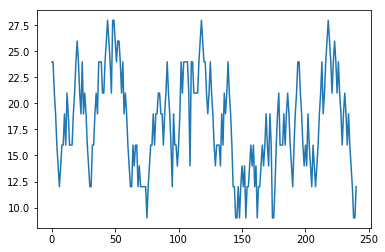

In [154]:
scale = all_saptak()
pyplot.plot([scale.index(s) for s in tune])

In [147]:
tune

['SA',
 'SA',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Sa',
 'Re',
 'Ga',
 'Ga',
 'Pa',
 'Ga',
 'Dha',
 'Pa',
 'Ga',
 'Ga',
 'Ga',
 'Pa',
 'Dha',
 'SA',
 'RE',
 'SA',
 'Dha',
 'Pa',
 'SA',
 'Pa',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Sa',
 'Sa',
 'Ga',
 'Ga',
 'Pa',
 'Dha',
 'Pa',
 'SA',
 'SA',
 'SA',
 'Dha',
 'Dha',
 'SA',
 'RE',
 'GA',
 'RE',
 'SA',
 'Dha',
 'GA',
 'GA',
 'RE',
 'SA',
 'RE',
 'RE',
 'SA',
 'Dha',
 'SA',
 'Pa',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Sa',
 'Sa',
 '',
 'Ga',
 'Re',
 'Ga',
 'Ga',
 'Sa',
 'Re',
 'Sa',
 'Sa',
 'Sa',
 'Sa',
 'Sa',
 'dha',
 'Sa',
 'Re',
 'Ga',
 'Ga',
 'Pa',
 'Ga',
 'Pa',
 'Pa',
 'Dha',
 'Dha',
 'Pa',
 'Pa',
 'Ga',
 'Pa',
 'Dha',
 'SA',
 'Dha',
 'Pa',
 'Ga',
 'Sa',
 'Pa',
 'Ga',
 'Ga',
 'Re',
 'Ga',
 'Pa',
 'SA',
 'Dha',
 'SA',
 'SA',
 'SA',
 'SA',
 'Dha',
 'Re',
 'SA',
 'SA',
 'Dha',
 'Dha',
 'Dha',
 'Dha',
 'SA',
 'RE',
 'GA',
 'RE',
 'SA',
 'SA',
 'Dha',
 'Pa',
 'Dha',
 'SA',
 'Dha',
 'Pa',
 'Ga',
 'Re',
 'Ga',
 'Ga',
 'Ga',
 'Re',
 'Pa',
 'Ga',
 'Dha',
 'Pa',
 'D